# FHIR example

FHIR (Fast Healthcare Interoperability Resources) is a standard for healthcare data exchange, developed by Health Level Seven International (HL7). It is built on modern web technologies and is designed to enable easier access to healthcare information, supporting JSON, XML, and RDF formats for data representation. FHIR defines a set of "resources" that represent granular clinical concepts, like patients, admissions, and medications, facilitating integration with existing healthcare systems and the development of new applications.

We want to emphasize that FHIR data is primarily designed for data exchanged and not for observational retrospective data. Such data should be stored in OMOP format.

Here, we'll show a quick example on a synthetic dataset to demonstrate how one could work with FHIR data in ehrapy.

In [1]:
import ehrapy as ep

In [ ]:
%% capture
!wget https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_fhir_latest.zip
!mkdir fhir_dataset
!unzip synthea_sample_data_fhir_latest.zip -d fhir_dataset

--2023-12-18 13:57:47--  https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_fhir_latest.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.110.153, 185.199.108.153, 185.199.109.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24187011 (23M) [application/zip]
Saving to: ‘synthea_sample_data_fhir_latest.zip’

synthea_sample_data 100%[===================>]  23.07M  11.8MB/s    in 2.0s    

2023-12-18 13:57:49 (11.8 MB/s) - ‘synthea_sample_data_fhir_latest.zip’ saved [24187011/24187011]

mkdir: cannot create directory ‘fhir_dataset’: File exists
Archive:  synthea_sample_data_fhir_latest.zip
  inflating: fhir_dataset/practitionerInformation1701791555719.json  
  inflating: fhir_dataset/Seth414_Stroman228_4bdb0674-f282-0681-98b4-ef790851bae1.json  
  

FHIR data is often times nested and contains lists and dictionaries.
Generally, there are three options to deal with this:
1. Transform the data into an awkward array and flatten it when needed.
2. Extract values from all lists and dictionaries to store single values in the fields.
3. Remove all lists and dictionaries. Only do this if the information is not relevant to you.

Here, we'll work with Pandas `DataFrames` to be able to apply option 3.

In [6]:
df = ep.io.read_fhir("fhir_dataset", return_df=True)
df = df[:1000]  # The dataset is very large so we subset to the first 1000 records

In [7]:
# Option 3: We're dropping any columns that contain lists or dictionaries and all columns that only contain NA values
df.drop(columns=[col for col in df.columns if any(isinstance(x, (list, dict)) for x in df[col].dropna())], inplace=True)
df.drop(columns=df.columns[df.isna().all()], inplace=True)

In [8]:
adata = ep.ad.df_to_anndata(df, index_column="id")
adata

2023-12-18 14:16:58,727 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `1000` x `65`.


AnnData object with n_obs × n_vars = 1000 × 65
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

In [9]:
ep.pp.knn_impute(adata)

Quality control metrics missing. Calculating...

ValueError! Setting quality control metrics to nan. Did you encode your data?

2023-12-18 14:16:58,901 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


Feature resource.issued had more than 40.10% missing values!

Feature resource.performedPeriod.start had more than 93.80% missing values!

Feature resource.started had more than 99.80% missing values!

Feature resource.abatementDateTime had more than 98.40% missing values!

Feature resource.date had more than 95.40% missing values!

Feature resource.payment.amount.value had more than 92.50% missing values!

Feature resource.provider.reference had more than 85.00% missing values!

Feature resource.custodian.reference had more than 95.40% missing values!

Feature resource.valueQuantity.unit had more than 56.20% missing values!

Feature resource.claim.reference had more than 92.50% missing values!

Feature resource.prescription.reference had more than 97.10% missing values!

Feature resource.valueCodeableConcept.text had more than 98.40% missing values!

Feature resource.numberOfInstances had more than 99.80% missing values!

Feature resource.maritalStatus.text had more than 99.90% missing values!

Feature resource.context.period.end had more than 95.40% missing values!

Feature resource.class.code had more than 95.30% missing values!

Feature resource.intent had more than 96.30% missing values!

Feature resource.numberOfSeries had more than 99.80% missing values!

Feature resource.authoredOn had more than 97.10% missing values!

Feature resource.multipleBirthBoolean had more than 99.90% missing values!

Feature resource.requester.reference had more than 97.10% missing values!

Feature resource.context.period.start had more than 95.40% missing values!

Feature resource.performedPeriod.end had more than 93.80% missing values!

Feature resource.birthDate had more than 99.90% missing values!

Feature resource.payment.amount.currency had more than 92.50% missing values!

Feature resource.period.end had more than 94.90% missing values!

Feature resource.medicationReference.reference had more than 99.40% missing values!

Feature resource.primarySource had more than 99.00% missing values!

Feature resource.onsetDateTime had more than 97.70% missing values!

Feature resource.patient.reference had more than 83.70% missing values!

Feature resource.serviceProvider.reference had more than 95.30% missing values!

Feature resource.gender had more than 99.90% missing values!

Feature resource.deceasedDateTime had more than 99.90% missing values!

Feature resource.created had more than 85.00% missing values!

Feature resource.vaccineCode.text had more than 99.00% missing values!

Feature resource.valueQuantity.value had more than 56.20% missing values!

Feature resource.occurrenceDateTime had more than 99.00% missing values!

Feature resource.total.currency had more than 92.50% missing values!

Feature resource.use had more than 85.00% missing values!

Feature resource.valueQuantity.system had more than 56.20% missing values!

Feature resource.total.value had more than 92.50% missing values!

Feature resource.effectiveDateTime had more than 39.50% missing values!

Feature resource.recordedDate had more than 97.40% missing values!

Feature resource.billablePeriod.start had more than 85.00% missing values!

Feature resource.valueQuantity.code had more than 56.20% missing values!

Feature resource.context.reference had more than 99.40% missing values!

Feature resource.location.reference had more than 92.60% missing values!

Feature resource.medicationCodeableConcept.text had more than 97.10% missing values!

Feature resource.outcome had more than 92.50% missing values!

Feature resource.criticality had more than 99.70% missing values!

Feature resource.text.status had more than 99.10% missing values!

Feature resource.referral.reference had more than 92.50% missing values!

Feature resource.facility.reference had more than 87.90% missing values!

Feature resource.period.start had more than 93.70% missing values!

Feature resource.class.system had more than 95.30% missing values!

Feature resource.code.text had more than 35.40% missing values!

Feature resource.billablePeriod.end had more than 85.00% missing values!

Output()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [10]:
adata = ep.pp.encode(adata, autodetect=True)

2023-12-18 14:17:26,540 - root INFO - The original categorical values `['resource.performedPeriod.start', 'resource.started', 'resource.date', 'resource.custodian.reference', 'resource.maritalStatus.text', 'fullUrl', 'resource.class.code', 'resource.intent', 'resource.authoredOn', 'resource.requester.reference', 'resource.birthDate', 'resource.payment.amount.currency', 'resource.primarySource', 'resource.onsetDateTime', 'resource.gender', 'resource.deceasedDateTime', 'resource.created', 'resource.effectiveDateTime', 'resource.recordedDate', 'resource.valueQuantity.code', 'resource.location.reference', 'resource.medicationCodeableConcept.text', 'resource.outcome', 'resource.subject.reference', 'resource.context.period.start', 'resource.billablePeriod.end', 'resource.issued', 'resource.abatementDateTime', 'resource.provider.reference', 'resource.valueQuantity.unit', 'resource.claim.reference', 'resource.prescription.reference', 'resource.valueCodeableConcept.text', 'resource.context.peri

Output()

2023-12-18 14:17:29,908 - root INFO - Encoding strings in X to save to .h5ad. Loading the file will reverse the encoding.


2023-12-18 14:17:29,996 - root INFO - Updated the original layer after encoding.


2023-12-18 14:17:32,026 - root INFO - The original categorical values `['resource.performedPeriod.start', 'resource.started', 'resource.date', 'resource.custodian.reference', 'resource.maritalStatus.text', 'fullUrl', 'resource.class.code', 'resource.intent', 'resource.authoredOn', 'resource.requester.reference', 'resource.birthDate', 'resource.payment.amount.currency', 'resource.primarySource', 'resource.onsetDateTime', 'resource.gender', 'resource.deceasedDateTime', 'resource.created', 'resource.effectiveDateTime', 'resource.recordedDate', 'resource.valueQuantity.code', 'resource.location.reference', 'resource.medicationCodeableConcept.text', 'resource.outcome', 'resource.subject.reference', 'resource.context.period.start', 'resource.billablePeriod.end', 'resource.issued', 'resource.abatementDateTime', 'resource.provider.reference', 'resource.valueQuantity.unit', 'resource.claim.reference', 'resource.prescription.reference', 'resource.valueCodeableConcept.text', 'resource.context.peri

In [11]:
ep.pp.pca(adata)
ep.pp.neighbors(adata, n_pcs=10)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.3, key_added="leiden_0_3")

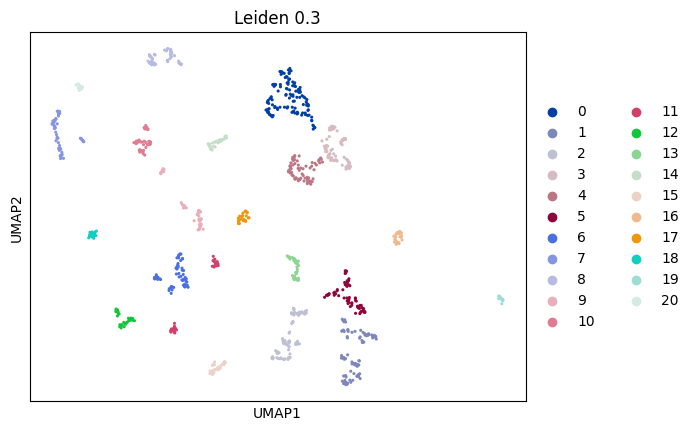

In [12]:
ep.pl.umap(adata, color=["leiden_0_3"], title="Leiden 0.3", size=20)